# 机器学习 - 线性回归

本文讨论线性回归，是机器学习中最简单的一种模型。同时我会讲到机器学习中一些常见的概念。

## 再谈监督学习

在监督学习中，模型需要从样本 $(x_i, y_i)$ 中学习到 $x$ 和 $y$ 的映射关系，即函数函数 $y = f(x)$。

### 回归模型

当 $y$ 是连续值的时候，监督学习的任务是学习到 $x$ 和 $y$ 的定量关系。如下图所示，$x$ 和 $y$ 的映射关系可以表示为一个一次函数。这种将 $x$ 映射到连续空间的问题就叫做回归。

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/2019/09/25/5d8b02fa451253d178802ae2.jpg)

### 分类问题

如果 $y$ 的取值范围是离散的集合，比如 {是, 否}、{高级,中级,初级}，我们称这种问题为分类问题。

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/2019/09/24/5d8a226e451253d1785ec030.jpg)

## 线性回归

后面我将给出一个例子引出线性回归的定义，并讲解求解线性回归的方法，最后给出线性回归的代码示例。

### 简单线性回归

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/2019/09/25/5d8b02fa451253d178802ae2.jpg)

上图中给出了一个坐标系，定义横坐标为 $x$ 纵坐标为 $y$，这样以来图中的每个点都可以表示为 $(x, y)$ 的坐标形式。设 $x$ 代表温度，$y$ 代表长度，我们假想有个东西会随温度变化而膨胀或收缩。但是我们并不知道温度和长度之间具体的关系是什么，我们只是在一段时间内在不同的温度下对物体的长度进行了测量。

经过测量后，就得到了一大堆 $(x,y)$ 的样本点，这些点散落在坐标系中，很明显，图中 $x$ 和 $y$ 具有某种关系，具体而言，其关系可以用 $y = ax+b$ 这种一次函数来描述。图中的点落在红色直线附近，这可能是因为测量的不准确，或者存在其他方面的误差。

这里 $y = ax+b$ 就是一个简单的一元线性回归模型，求出模型参数 $a$ 和 $b$，$x$ 和 $y$ 的关系就唯一确定下来了。在这个例子中，我们就能知道温度和物品长度的大致关系了。


### 线性回归模型定义

线性回归问题的一般设定是：

给定 $n$ 个样本 $(x_i,y_i)$，其中 $x_i$ 是 $m$ 维向量，对应样本的 $m$ 维特征。$x$ 是自变量，$y$ 是应变量。这里 $x_i$ 是向量，可以写为：$(x_i^{(0)}, x_i^{(1)}, ...x_i^{(m)})$，下标是样本的编号，上标为特征编号。

线性回归的任务是找到一个函数 $h_w(x)$，代入具体参数 $x_i$ 使 $h_w(x_i)$ 的值尽可能接近 $y_i$，线性回归中 $h_w(x)$ 的定义如下：


$$
h_w(x) = w^Tx + b
$$


其中 $w$ 是和 $x$ 具有相同维度的向量，$w^Tx$ 是两个向量的内积。$w$ 和 $b$ 是线性回归模型的参数。

之所以称之为线性模型，是因为这里 $y$ 的值实际上就是 $x$ 的各个维度加求和，最后加上一个偏置得来的。其中权重就是 $w$，偏置是 $b$。机器学习算法的就是用来寻找这个 $w$ 和 $b$。

## 问题求解

$x$ 和 $y$ 之间存在某种函数关系，即 $y = f(x)$，但是这个 $f$ 我们并不知道。我们能做到只能根据样本去估计 $f$。

设估计出的函数为 $h$，为了使 $h$ 和尽可能 $f$ 一致，可以最小化下面的函数：

$L(w,b) = E((f(x)-h(x))^2)$

即 $h$ 和 $f$ 的误差的平方的期望值，再定义域上各处，$f$ 和 $h$ 的值相差越小，这里期望值越小。这里我们将 $L$ 称为损失函数。若机器学习模型找出的函数 $h$ 和实际函数 $f$ 存在差异，我们就称该模型存在风险，即带来误差的风险，这里的 L 就称为期望风险，因为它是风险的期望值。

如果 $f$ 和 $h$ 的定义给出来了，那么我们在其值域上做个积分就能求出这里的期望风险，但是 $f$ 是不知道的，但是有一点可以确定，样本 $(x,y)$ 中的 $y = f(x)$，我们可以求出所有样本的损失的均值，以此来代替期望风险。

于是我们只需要最小化下面的函数即可：

$L(w,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2$

下图中直线是估计出的 $h(x)=wx+b$，样本点距离直线的距离的平方的均值越小，我们就认为 $h$ 越贴近那个潜在的 $f$。

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b5e88451253d178924cc1.jpg)


有了上述定义，我们需要做的就是找出 $w$ 和 $b$ 让 $L$ 最小，这一步通常使用梯度下降法来完成。


## 梯度下降

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b6490451253d178946039.jpg)

可以想象自己在下山，为了快速下到山脚下，我们每一步都向最陡峭的方向跨一步，然后再寻找最陡峭的方向，继续向下走，如果这个山不存在山坳（凹下去的坑），那么我们很快就能下到山脚下。

梯度下降法就是这个思路，只不过下的不是山，而是函数值，最陡峭的方向值梯度值。

回到上面的例子中：

$$
L(w,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2 =  \frac{1}{n}\sum_{i=1}^n (y_i - (wx_i+b))^2
$$

可以很轻松地对 $w$ 和 $b$ 求导数，然后带入 $x$ 和 $y$ 求出 $w$ 和 $b$ 的导数，然后更新 $w$ 和 $b$:

$$
w_i = w_i - α{∂ \over ∂w_i}L(w,b)
$$

$$
b = b - α{∂ \over ∂b}L(w, b)
$$

这里的 $\alpha$ 是每一次更新的大小，即对应你下山的时候跨出的步伐大小。

梯度下降法可以分为下面几种：

### 1. 批梯度下降

注意到，前面求导的式子中，$L$ 可是在所有样本上计算出来的，所以求导的这一步也需要在所有样本上计算。

在全部样本上，计算能使整体误差变化最大的方向，然后用这个方向来更新参数。多次计算梯度并更新参数，最终会收敛到局部极小值。

但当样本量很大的时候，计算所有样本的梯度会是一个相当耗时的操作。对于样本量很大的情况，此方法不适用。

因为 $L$ 包含所有样本误差之和，更新 $h$ 的参数可以让部分样本点的误差将为 0，但同时可能增加其他样本的误差。使用全部样本计算梯度，是让整体的误差变小。

### 2. 随机梯度下降

如果最终得到的模型，让整体误差最小，那么对单个样本误差的误差也应该很小，因此只需要不断地让某一样本的误差变小，那么整体误差就会变小。

使用随机梯度下降法，每次迭代只是考虑让单个样本点的误差变小，而不管其他点。这样重复多次，实际上就可以让整体的误差变小。


### 3. Mini-batch 梯度下降

样本中可能存在噪声，使用随机梯度下降可能导致计算出的结果震荡严重，因为毕竟不是每个样本都与全局最佳模型完全吻合。批梯度下降用了全部样本求出梯度均值，得出的是全局误差梯度最大方向。而随机梯度下降，只用了单个样本，求的是单个样本的误差梯度最大方向。Mini-batch 梯度下降，采用一小部分样本，比如 100 个样本，求这一小部分样本误差梯度最大的方向。这样既能得到很快的计算速度，同时也可避免严重的震荡。

在成熟的机器学习库中，计算梯度这样的操作常常是借助 GPU 来完成的，计算过程是矩阵化的操作，因此在单个样本或是一批样本上计算梯度，对 GPU 而言几乎是相同的。

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b6a78451253d17896106f.jpg)

对于只有两个参数的线性模型，采用梯度下降更新其参数，上图展现了三种方法中两个参数的变换趋势。可以看到批梯度下降的路径非常平滑，随机梯度下降的波动很剧烈，而 Mini-batch 梯度下降的波动居于两者之间。



## 过拟合与欠拟合

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b6acb451253d178962738.jpg)

上图中，红色曲线是 $h$ 绿色曲线是 $f$，即 $h$ 是机器学习学到的模型，$f$ 是实际产生样本的函数（真实的模型，只有上帝知道的模型）。我们希望学到的模型最贴合实际。

第一幅图中，学到的模型和真实模型差距很大，且对样本拟合的也很差，我们称当前的模型欠拟合。

**拟合**： 用一个函数去逼近样本的分布，可以说机器学习就是一个拟合样本的过程。

最后一幅图，学习到的模型与所有样本完全吻合，每一一丝的误差。但是机器学习的目的不在于拟合样本，而是尽可能逼近真实的模型。我们称第四幅图过拟合。

可见，欠拟合与过拟合都是我们想要极力避免的。欠拟合通常是是因为模型过于简单，比如图一的模型中可能只有一个参数，即截距 $b$。而图四中的模型过于复杂，拟合能力过强。

## 学习速率

下面式子中的 $\alpha$ 称为学习速率，可以看到这个值越大 $w_i$ 变化的也就越快。

$$
w_i = w_i - α{∂ \over ∂w_i}L(w,b)
$$

正常情况下，每次像梯度的反方向走一步，误差都会变小。但是如果学习速率选择的过小，迈出的这一步就会很小，收敛速度会变慢。过大则可能越过了最佳点，导致在最优解附近震荡。

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/2019/09/26/learning_rate.gif)

合适的学习速率，可以使得误差稳步减小，且减小幅度慢慢变少，最终能较为迅速地达到最佳点。


## 正则化

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b6acb451253d178962738.jpg)

前面提到，实际的映射关系 $y=f(x)$ 是不知道的，所以最小化期望误差，或期望风险是不可行的，于是我们最小化样本的误差。上图中，红色曲线是 $h$ 绿色曲线是 $f$，这里估计出的模型 $h(x)=wx+b$ 确实做到了最小化样本误差，它与所有样本完全吻合，甚至没有误差。但是我们知道，这不是期望得到的模型。我们的模型应该反映整体的趋势，而不是完全拟合样本。

严格的线性模型往往是直线或者平面，为了得到曲线可以在模型从引入自变量的幂，构成一个多项式模型：

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b7231451253d178984200.jpg)

多项式模型能够表达一维线性模型能表达的一切，能够拟合更加复杂的关系，但自然界中的大多数关系都是比较简单的，所谓大道至简，机器学习模型也是这样，在能够大致拟合样本的前提下，我们希望模型越简单越好。

观察出现过拟合的图四，其中曲线的变化非常剧烈，为了完全拟合个别点，在某些位置曲线剧烈的上升和下降。而我们希望得到的是一个平滑的曲线，比如图三那样。因为自然界倾向于简单，我们不知道的那个真实模型 $f$ 也往往不会很复杂。

变化剧烈的函数存在一个特点，即在某些点斜率很大，对应到线性模型中，就是某个 $w_i$ 的值会很大，前面四幅小图是用不同幂次的多项式模型进行拟合的。下表列出了各个模型的参数 $w$ 的取值。

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b7352451253d178989e33.jpg)

为了让曲线保持平滑，让曲线避免剧烈的波动，就需要控制系数，让系数不能变的过大。为了让系数保持适当大小，做法就是添加正则化项，把系数加入到损失函数中，这样以来系数变大，损失函数的值也就变大。


$$
L(w,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2 + \lambda {\Vert w \Vert}^2
$$

这里 $\lambda {\Vert w \Vert}^2$ 就是正则化项，当模型很复杂的时候，这一项的值就会变大，损失函数的值也就会变大，加入着一些，可以保证模型复杂度和误差之间保持协调。

上面式子中的 λ 能够控制正则化项对误差的影响，当 λ 很小的时候，w 的大小对整个误差构不成太大影响，这个时候正则化项就没起到什么作用。因此调整这个值的大小可以控制正则化的作用强度。


常见的正则化策略有：

- L2 正则化
- L1 正则化

### L2 正则化

L2 正则化项是系数的平方和：


![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b75ef451253d178995a88.jpg)

_从李宏毅老师的 PPT 中截的图_

求导后，正则化项中还包含一个 λw：

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b7662451253d1789981c9.jpg)

因此 $w$ 每次更新都会减小一定得比例。最终，个别不重要的项的系数会变成一个很小的小数，但不为零。采用 L2 正则化得出的模型的系数都比较小。

### L1 正则化

L1 正则化的正则化项是系数的绝对值求和：

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b76e2451253d17899ac72.jpg)

每次更新，正则化想会导致 $w$ 被减掉或者加上 $\eta \lambda$（取决于 w 的符号）。

### 关于稀疏解

模型的输入 $x$ 可能包含很多特征，但是究竟那些特征才是有用的特征呢？我们希望模型的参数给出说明，当 $w_i$ 较小的时候，我们认为 x 的第 $i$ 维特征不重要。如果 $w_i$ 干脆为 0，那么可以说第 $i$ 维特征就完全没用，可以完全去除这一特征，精简模型。

提到正则化，人们必然会讨论 L1 正则更可能得到稀疏解，即 w 的某些维度会取值为 0，下面来进行解释：

**图形化解释**

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b79f8451253d1789a8d55.jpg)

假设参数 $w$ 是两维的，L2 正则项的等值线是以原点为中心的一个个圈圈，上图中彩色圈圈可以视为样本误差的等值线。随着 $w$ 的变化，这两项的取值的会变化的。整体 $L$ 的取值是两个等值线在某个交点的值求和，L2 正则化中等值线的交点往往落在某个象限中。


![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/5d8b7ad3451253d1789ace77.jpg)

L1 正则化项的等值线是一个个矩形，和误差项等值线交点更有可能落在坐标轴上。

**数学解释**

**TODO**

## 数据归一化

各变量的数量级不同，有的超过几千，有的绝对值则不大于 1。这时 Cost Function 的等高图看起来像是下图中左边的样子：

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/2019/09/26/5d8cb7ae451253d178ee38fe.jpg)

梯度下降要进行很多次迭代，因此需要对变量进行归一化处理，让所有变量都落在相近的范围内，可以加快找到极小值点的速度。

具体的操作可以是，对所有样本的各个属性，找到这个属性的均值，以及标准差。对各个属性减去均值并除以标准差。这样以来样本的各个维度的均值为 0，方差为 1。

![](https://wangyu-name.oss-cn-hangzhou.aliyuncs.com/superbed/2019/09/26/5d8cb76e451253d178ee276b.jpg)

## 线性回归实践

### 一元线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

这里我人为设定真实的模型为 $y = 4x+2$，另外加上均值为 0，标准差为 4 的高斯噪声，然后使用此模型生成一些数据，使用线性回归模型来进行拟合，看看拟合效果。

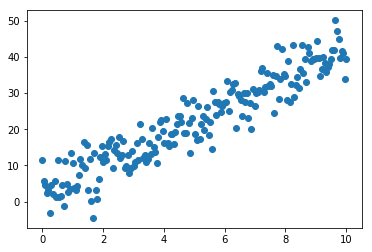

In [2]:
x = np.linspace(0, 10, 200)
y = 4 * x + 2 + np.random.normal(0, 4, 200)

x = x.reshape(-1, 1)
plt.scatter(x[:,0], y)

我不在自己从零开始实现 LinearRegression 而是直接使用 sklearn 这个优秀的机器学习库。我推荐新手直接使用现成的库，去感受机器学习算法，而不要一开始就盯着细节。

使用 sklearn 以后，如下代码就能实现线性回归：

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

新构造出一些 x ，用上面训练好的模型来预测：

In [4]:
x_new = np.random.random((50,1)) * 10
y_pred = lr.predict(x_new)

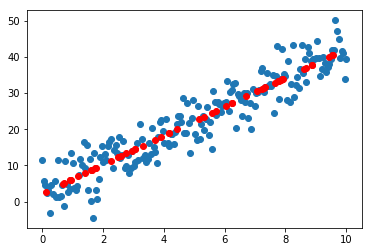

In [5]:
plt.scatter(x[:,0], y)
plt.scatter(x_new[:,0], y_pred, c='red')

新来的样本落于一条直线上，这条直线就是回归模型学到的，观察模型参数，和产生数据的模型很接近。

In [6]:
lr.coef_, lr.intercept_

(array([4.00044564]), 2.239418872523075)

### 误差

上面的例子中，训练样本和训练得到的模型之间存在误差，我们可以使用使用下面代码计算一下：

In [7]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(x)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

4.238984148444511

这里得到的均方根误差和前面加入的高斯噪声的方差很接近，其实理论上就应该是 4 的。

再回归模型中，均方根误差有着重要的性质，均方根误差其实就是误差的标准差。如果误差呈高斯分布，那么这里的均方根误差就是误差的标准差，即高斯分布中的 $\sigma$。3$\sigma$ 的理论说，高斯分布中的样本距离均值距离小于 $1\sigma$ 的概率为 68%，小于 $2\sigma$ 的概率为 85%，小于 $3\sigma$ 的概率为 99.7%。

因此，有了模型的均方根误差，就能够估计当前模型预测出的结果与实际值的差异。比如均方根误差为 4，那就说明有 68% 的可能性，误差小于 4，有 95% 的可能性误差小于 8，以此类推。

### 使用正则化

如果要想使用带有正则化的线性回归，可以使用 `Lasso` 和 `Ridge`。这里我使用 `make_regression` 生成了 10000 个样本，每个样本有 10 个特征，其中只有 5 个有意义。

In [4]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=10000, n_features=10, n_informative=5)

#### L1 正则化

要想使用 L1 正则化，可以使用 `Lasso` 类：

In [5]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(x, y)
lasso.coef_

array([80.17853949,  2.20934648, 12.11783159, -0.        ,  0.        ,
       39.47341535,  0.        , -0.        , -0.        , 37.02262417])

#### L2 正则化

要想使用 L2 正则化，可以使用 `Ridge` 类，L2 正则化的线性回归也叫作岭回归。

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(x, y)
ridge.coef_

array([ 8.11755063e+01,  3.16308209e+00,  1.31036902e+01, -1.63406892e-04,
        1.30984317e-04,  4.04597611e+01,  8.24451723e-05, -6.75223824e-05,
       -1.83452397e-05,  3.80118322e+01])

#### L1 + L2

如果想要同时使用 L1 和 L2 正则化，可以使用 `ElasticNet`:

In [8]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(l1_ratio=0.5)
elastic.fit(x, y)
elastic.coef_

array([ 5.35787131e+01,  1.84979079e+00,  8.48145028e+00, -2.28297205e-02,
        0.00000000e+00,  2.67749729e+01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.50762698e+01])

可以看到使用 L1 正则化确实得到了稀疏解，使用 L2 得到的参数都比较小。


## 推荐阅读

关于线性回归理论，推荐看李宏毅老师[机器学习课程](http://speech.ee.ntu.edu.tw/~tlkagk/courses_ML16.html)关于回归和梯度的章节。

另外建议花时间尝试 sklearn 这个机器学习库，skleran 的[用户手册](https://scikit-learn.org/stable/user_guide.html)是非常不错的资源，你可以尝试其中的例子，并尝试弄清楚其中的原理。

了解常用的机器学习工具是很有必要的，学习如何使用 jupyter notebook，以及了解机器学习中常用的数据处理库，numpy 和 pandas，matplotlib 等。学习这些内容我推荐阅读 [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)。

[Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://book.douban.com/subject/30310982/) 是目前最好的机器学习实战书籍，强烈建议阅读。